# Import Requaired Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import tensorflow as tf
import os
# Converting the columns/Datatypes
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay

# Load DataSet & Check the output

In [101]:
df = pd.read_csv('/content/onlinefraud.csv')
df.drop('isFlaggedFraud', axis = 1, inplace = True)

In [102]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [103]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
42266,9,CASH_OUT,195364.06,C1096102092,0.0,0.0,C2021579766,506957.59,1343781.67,0.0
42267,9,CASH_OUT,546075.62,C1791035294,0.0,0.0,C1039162432,5075471.31,5621546.93,0.0
42268,9,CASH_OUT,111003.87,C1145755913,0.0,0.0,C743528393,2533159.94,2644163.81,0.0
42269,9,CASH_OUT,101025.44,C292739335,0.0,0.0,C299715257,156646.32,491301.04,0.0
42270,9,CASH_OUT,271441.28,C2034845877,0.0,0.0,C71127,NaN,NaN,NaN


In [104]:
df.shape

(42271, 10)

# Exploring Data Analysis (EDA)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.2+ MB


In [106]:
df.isna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
42266,False,False,False,False,False,False,False,False,False,False
42267,False,False,False,False,False,False,False,False,False,False
42268,False,False,False,False,False,False,False,False,False,False
42269,False,False,False,False,False,False,False,False,False,False


In [107]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64

In [108]:
df.isna().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest     True
newbalanceDest     True
isFraud            True
dtype: bool

- We have a missing values in our dataset, and that we need to handle it.

***Remove Missing Values:***
If the missing values are a small proportion of the dataset and removing them does not significantly affect the analysis, you can simply remove rows or columns containing missing values. This can be done using the `dropna()` function in `pandas`

In [109]:
df.dropna(inplace=True)  # Drop rows with missing values

In [110]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

- Now, we can see that there are no missing values, let's move to the next step.

In [111]:
df.describe(include="O")

,type,nameOrig,nameDest
count,42270,42270,42270
unique,5,42270,24625
top,PAYMENT,C1231006815,C985934102
freq,19382,1,73


- To know how many unique values

In [112]:
df['type'].value_counts()

type
PAYMENT     19382
CASH_OUT    10688
CASH_IN      7632
TRANSFER     3974
DEBIT         594
Name: count, dtype: int64

In [113]:
df['nameOrig'].value_counts()

nameOrig
C1231006815    1
C427978936     1
C616186877     1
C1061681008    1
C894060432     1
              ..
C1528717993    1
C1061133744    1
C619429631     1
C214473697     1
C292739335     1
Name: count, Length: 42270, dtype: int64

In [114]:
df['nameDest'].value_counts()

nameDest
C985934102     73
C1286084959    66
C1590550415    63
C2083562754    62
C977993101     61
               ..
C1754599205     1
C2078522098     1
M1426815634     1
M216894663      1
M1111680498     1
Name: count, Length: 24625, dtype: int64

- using `value_counts()` method we can see number of unique values in categorical type of feature.

In [115]:
type_unique = df.type.unique()
type_unique

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [116]:
nameorig_unique = df.nameOrig.unique()
nameorig_unique

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1791035294',
       'C1145755913', 'C292739335'], dtype=object)

In [117]:
namedest_unique = df.nameDest.unique()
namedest_unique

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C1300542994',
       'M1295827064', 'M1111680498'], dtype=object)

In [118]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
]

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |        1.77 |       1e+07 |
|  1 | oldbalanceOrg  |           0 | 2.85472e+07 |
|  2 | newbalanceOrig |           0 | 2.86174e+07 |
|  3 | oldbalanceDest |           0 | 2.95845e+07 |
|  4 | isFraud        |           0 |           1 |


In [119]:
# Downcast numerical columns with smaller dtype
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')

In [120]:
# Check duplicate values
df.duplicated().sum()

0

- There are no duplicate values.

In [121]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,6)

# Data Visualization
We will do three type of Visualization:
- Univariate Data Visualization
- Bivariate Data Visualization
- Multivariate Data Visualization

Let's start from **Univariate Data Visualization**

In [122]:
df['step'].value_counts()

step
8    21097
9     7172
7     6837
1     2708
6     1660
2     1014
5      665
4      565
3      552
Name: count, dtype: int64

- There are 743 steps, and every step has at least 2 occurrences.

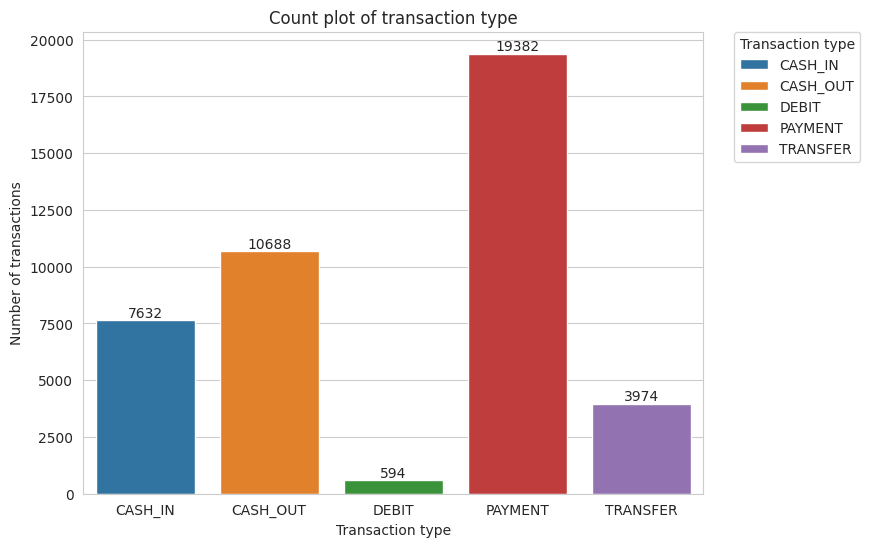

In [123]:
ax = sns.countplot(x='type', data=df, hue='type')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')

# Sort the unique values in the 'type' column
legend_labels = sorted(df['type'].unique())

plt.legend(labels=legend_labels, title='Transaction type', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Number of transactions')
plt.xlabel('Transaction type')
plt.show()

- **Cash out** is the **most numerous** transaction type, followed by payment, cash in, transfer and debit types.


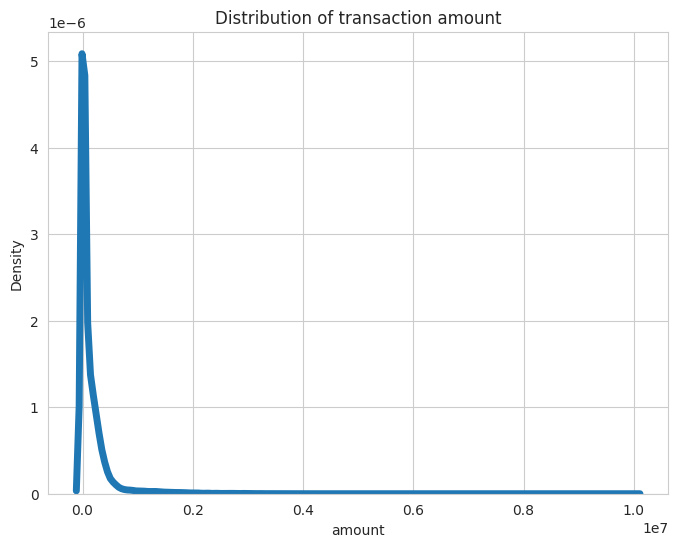

In [124]:
sns.kdeplot(df['amount'], linewidth = 5)
plt.title('Distribution of transaction amount')
plt.show()

- The distribution of transaction amounts is **right skewed**.
- This indicates that most values are clustered around the left tail of the distribution, with the longer right tail.
- (mode < median < mean)

In [125]:
df['nameOrig'].value_counts()

nameOrig
C1231006815    1
C427978936     1
C616186877     1
C1061681008    1
C894060432     1
              ..
C1528717993    1
C1061133744    1
C619429631     1
C214473697     1
C292739335     1
Name: count, Length: 42270, dtype: int64

There are **14246** initial customers, and every step has **at least 1** occurrence.

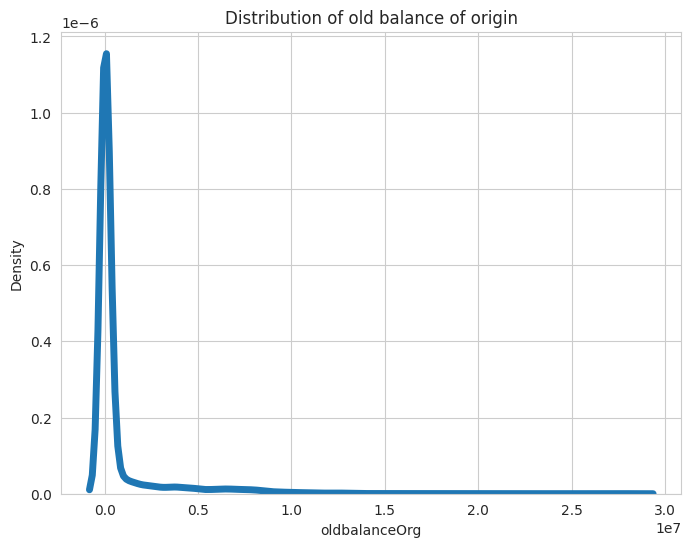

In [126]:
sns.kdeplot(df['oldbalanceOrg'], linewidth=5)
plt.title(  'Distribution of old balance of origin')
plt.show()

- The distribution of pre-transaction balances of the initial customers is **right skewed**.

Text(0.5, 1.0, 'Distribution of transaction amount')

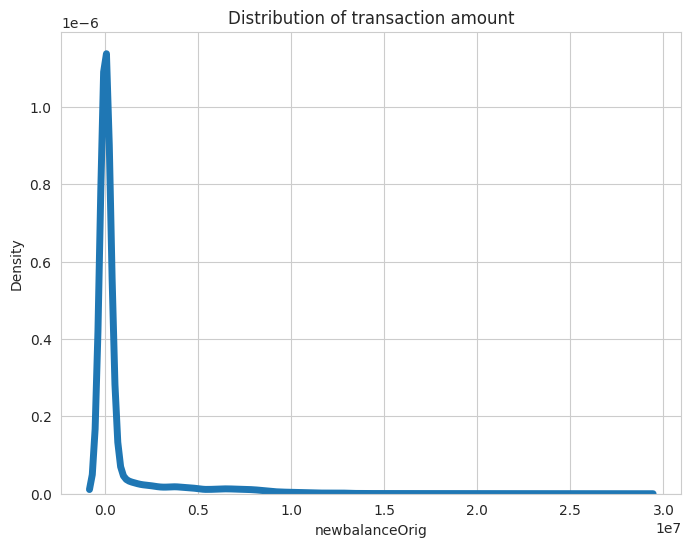

In [127]:
sns.kdeplot(df['newbalanceOrig'], linewidth=5)
plt.title('Distribution of transaction amount')

- The distribution of post-transaction balances of the initial customers is **right skewed**.

In [128]:
df['nameDest'].value_counts()

nameDest
C985934102     73
C1286084959    66
C1590550415    63
C2083562754    62
C977993101     61
               ..
C1754599205     1
C2078522098     1
M1426815634     1
M216894663      1
M1111680498     1
Name: count, Length: 24625, dtype: int64

- There are **9472** recipients, and every step has **at least 1** occurrence.

Text(0.5, 1.0, 'Distribution of transaction amount')

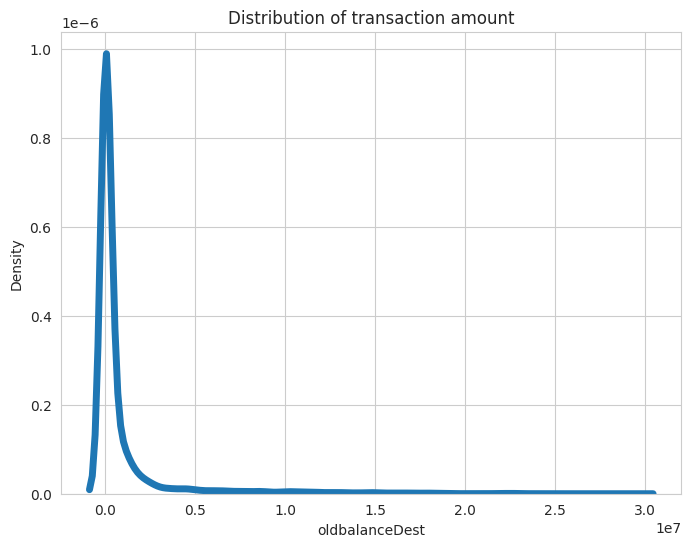

In [129]:
sns.kdeplot(df['oldbalanceDest'], linewidth=5)
plt.title('Distribution of transaction amount')

- The distribution of **pre-transaction** balances of the recipient is **right skewed**.

Text(0.5, 1.0, 'Distribution of transaction amount')

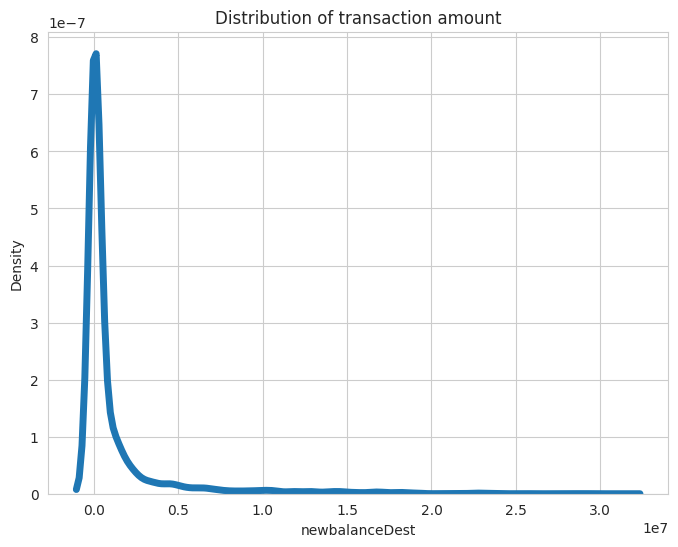

In [130]:
sns.kdeplot(df['newbalanceDest'], linewidth=5)
plt.title('Distribution of transaction amount')

- The distribution of **post-transaction** balances of the recipient is **right skewed**.

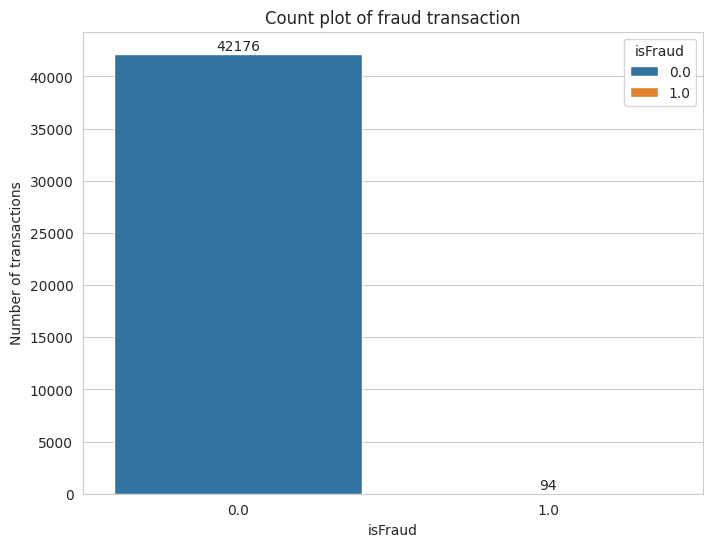

In [131]:
ax = sns.countplot(x='isFraud', data=df, hue='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

- There are much **more non-fraudulent transactions** than fraudulent transactions.

## Bivariate data visualization

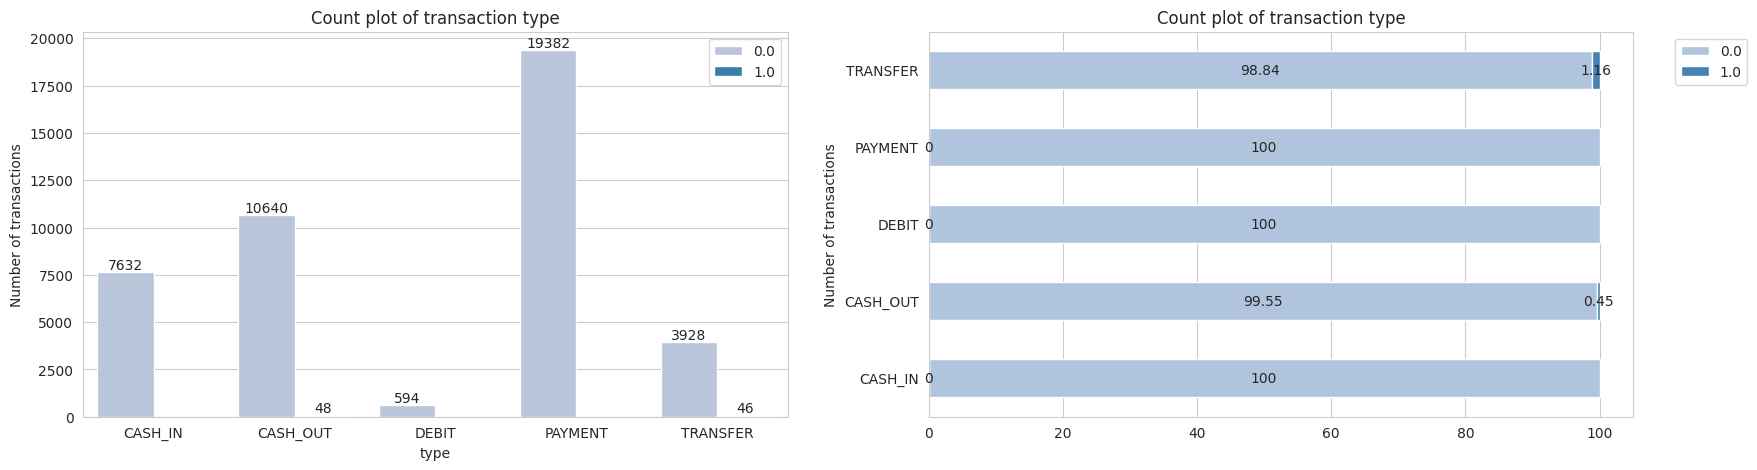

In [132]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

- Fraudulent transactions only occur in **debit** and **transfer types**.

Text(0, 0.5, 'Number of transactions')

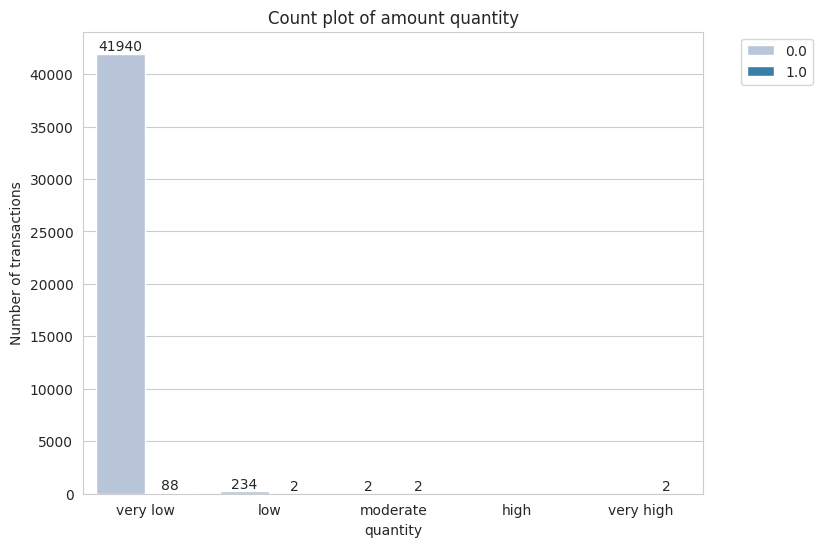

In [133]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

- All fraudulent transactions fall into the category of **very low** amounts.
- This suggests that in most cases, **small transactions** are more prone to fraudulent transactions.

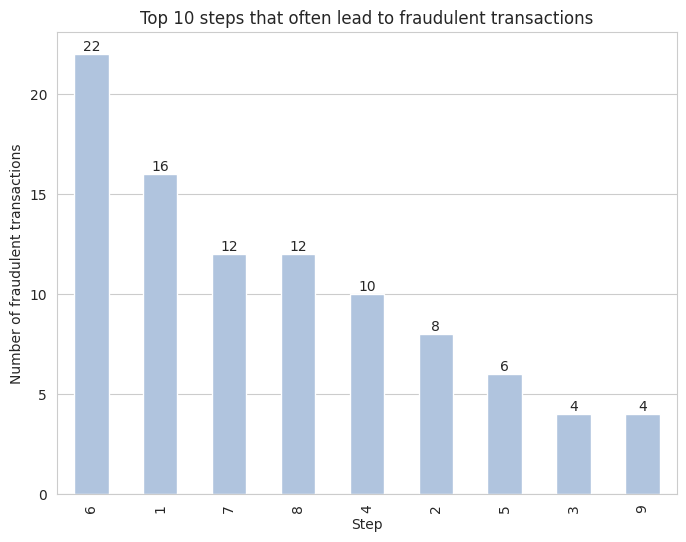

In [134]:
df1 = df[df['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

- **Step 22** has the highest number of fraudulent transactions, 40 cases.
This indicates that Step 22 is the step that will most likely lead to fraudulent transactions.

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

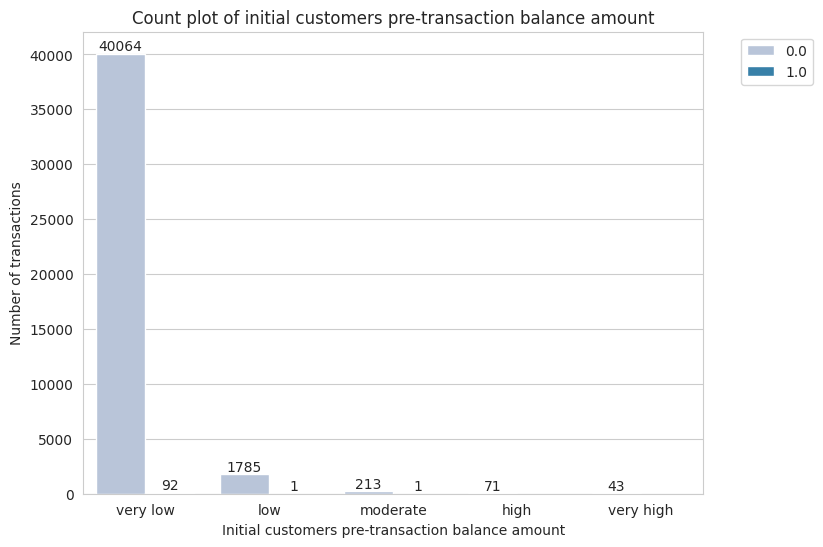

In [135]:
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

- Initial customers with **very low pre-transaction balances** has the highest number of fraudulent transactions. This means that initial customers with very low pre-transaction balances may be more likely to fall for a fraudulent transaction.

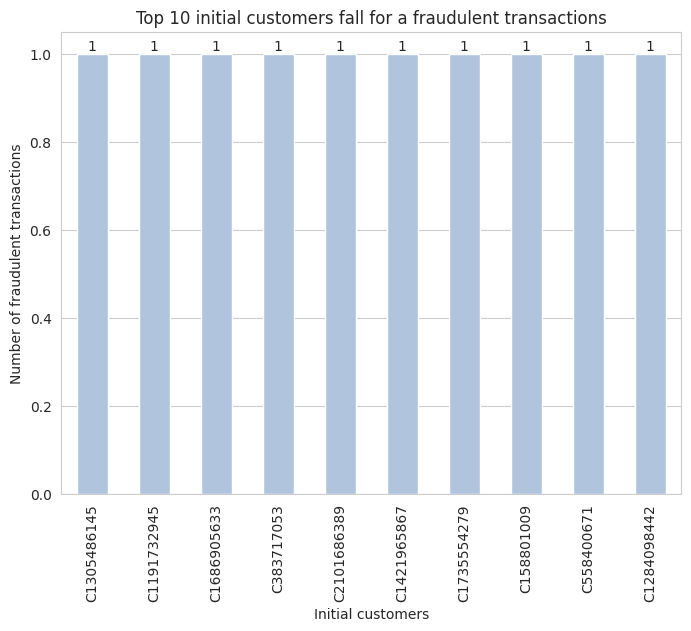

In [136]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2

- **Initial customers** are scammed of **at most one** for a fraudulent transaction.

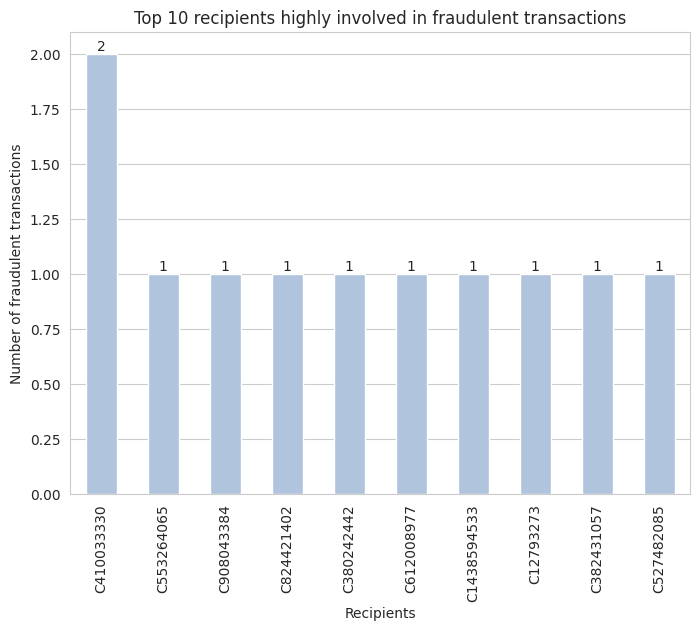

In [137]:
df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, df2

- **Suspicious recipients** only have a **maximum of 2** involved fraudulent transactions.

Text(0.5, 0, 'Recipient pre-transaction balance amount')

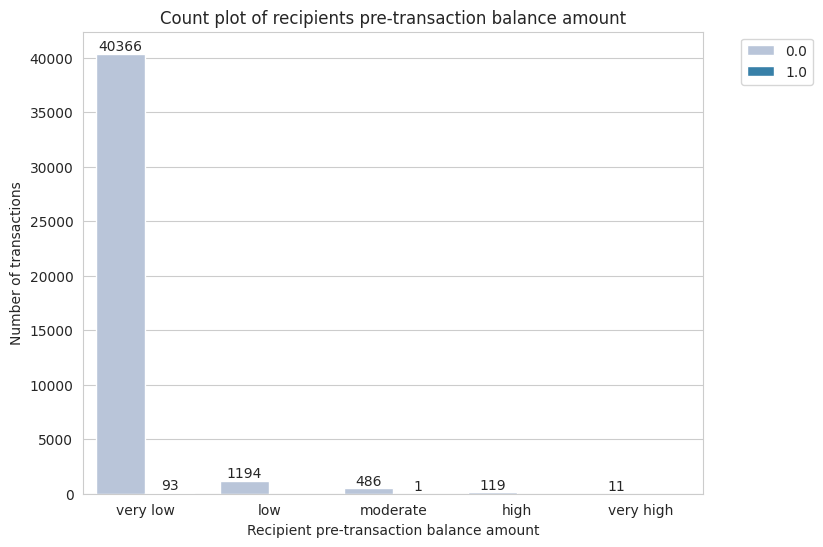

In [138]:
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

Recipients with **very low pre-transaction balances** has the highest number of fraudulent transactions. This implies that recipients with very low pre-transaction balances may be more susceptible to fraudulent transactions.

## Data Filtering
- Now, we have categorical feature, so we need to convert it into numeric values using `LabelEncoder()` from `sklearn.preprocessing` packages for using our dataset into model and finding the correlation matrix.

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42270 entries, 0 to 42269
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   step                42270 non-null  uint8   
 1   type                42270 non-null  category
 2   amount              42270 non-null  float64 
 3   nameOrig            42270 non-null  object  
 4   oldbalanceOrg       42270 non-null  float64 
 5   newbalanceOrig      42270 non-null  float64 
 6   nameDest            42270 non-null  object  
 7   oldbalanceDest      42270 non-null  float64 
 8   newbalanceDest      42270 non-null  float64 
 9   isFraud             42270 non-null  float32 
 10  quantity            42270 non-null  category
 11  oldbalanceOrg_amt   42270 non-null  category
 12  oldbalanceDest_amt  42270 non-null  category
dtypes: category(4), float32(1), float64(5), object(2), uint8(1)
memory usage: 2.9+ MB


In [140]:
label_encoders = {}
for col in df.select_dtypes(include=['object','category']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt
0,1,3,9839.64,4925,170136.0,160296.36,14933,0.0,0.0,0.0,3,4,4
1,1,3,1864.28,14492,21249.0,19384.72,15557,0.0,0.0,0.0,3,4,4
2,1,4,181.00,6538,181.0,0.00,4059,0.0,0.0,1.0,3,4,4
3,1,1,181.00,38737,181.0,0.00,3611,21182.0,0.0,1.0,3,4,4
4,1,3,11668.14,22834,41554.0,29885.86,7454,0.0,0.0,0.0,3,4,4


## Multivariate data visualization

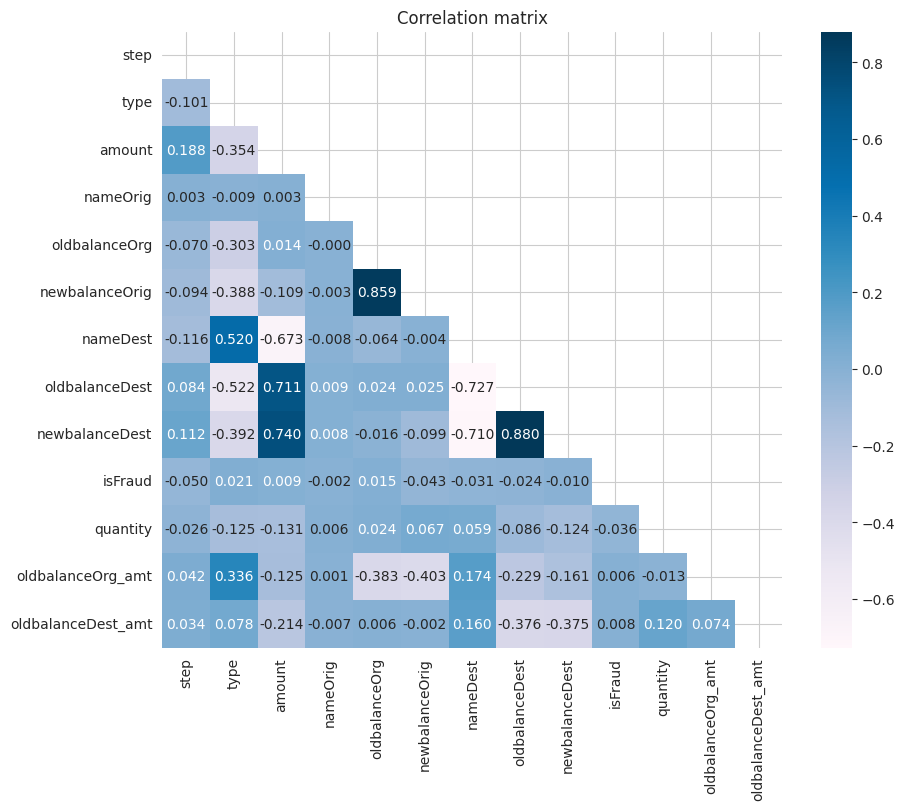

In [141]:
# Assuming 'df' is your DataFrame
corr_matrix = df.corr('spearman')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, cbar=True, annot=True, fmt='.3f', cmap='PuBu')

plt.title('Correlation matrix')
plt.show()  # Make sure to include the parentheses


- newbalanceOrig and oldbalanceOrg has **strong positive** relationship.
- newbalanceDest and oldbalanceDest has **strong positive** relationship.

# Model Building

In [142]:
# Data preprocessing
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

- Due to the large dataset, Random Forest and Logistic Regression with balanced class weight are used to identify online payment fraud.

In [143]:
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

X = df.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'], axis=1, inplace=True)
y = X.pop('isFraud')

# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [144]:
def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))

        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))

        print('\n')

In [145]:
classifiers = { 'Random Forest Classifier':RandomForestClassifier(class_weight='balanced', random_state=seed),
                'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed)
              }

In [146]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [147]:
model_comparison_evaluate(classifiers, X_train, y_train)

K-Fold Cross-Validation:

Random Forest Classifier:


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mean accuracy score: 0.860 (0.044)
Mean precision score: 0.865 (0.083)
Mean recall score: 0.867 (0.042)
Mean f1 score: 0.863 (0.038)
Mean roc_auc score: 0.943 (0.023)


Logistic Regression:
Mean accuracy score: 0.807 (0.025)
Mean precision score: 0.857 (0.095)
Mean recall score: 0.760 (0.068)
Mean f1 score: 0.798 (0.010)
Mean roc_auc score: 0.843 (0.053)




# Summary Report

Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       0.85      1.00      0.92      7180
    Fraud [1]       0.63      0.01      0.02      1274

     accuracy                           0.85      8454
    macro avg       0.74      0.50      0.47      8454
 weighted avg       0.82      0.85      0.78      8454
 



Text(0.5, 0, 'False Positive Rate')

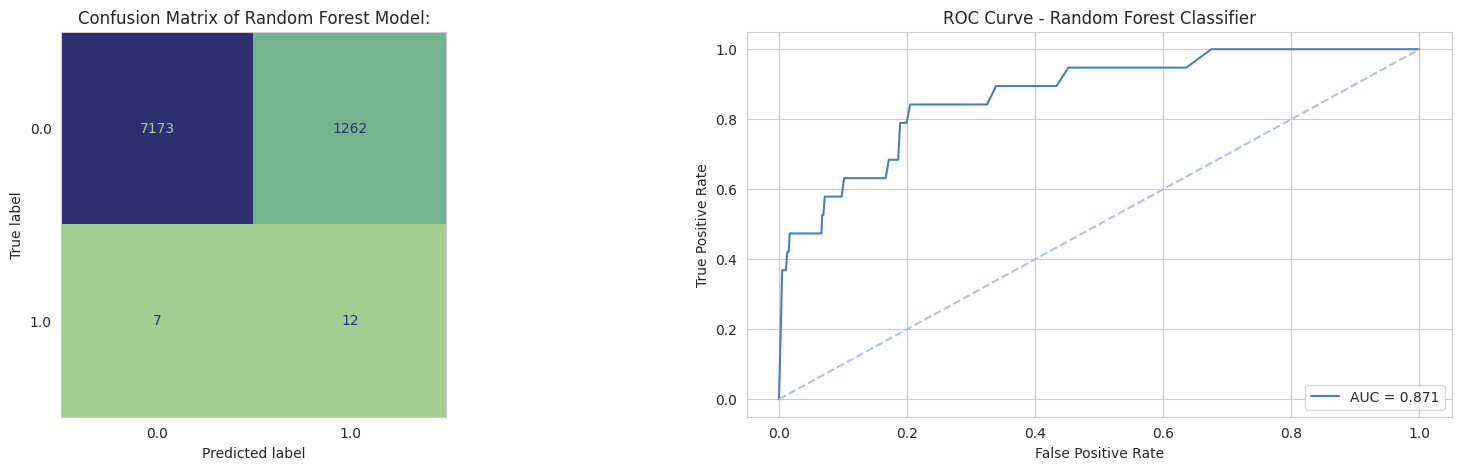

In [148]:
model = RandomForestClassifier(class_weight='balanced', random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:,1]
print('Random Forest Classifier:')
print(classification_report(y_pred, y_test, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')



fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

- From the confusion matrix, 7173 were correctly classified as non-fraudulent payments, and 1262 people were misclassified as non-fraudulent payments.
- According to the confusion matrix, 12 payments were incorrectly labelled as fraud while 7 payments were correctly identified as fraud.

# Conclusion
- Random Forest obtains the highest score of all using K-fold cross-validation.
- The best performing model is **Random Forest** for identifying fraudulent and non-fraudulent payments, as the AUC is 0.999, which is close to 1. This means it has a good separability measure, and the model has an 99.9% chance of being able to distinguish between positive and negative classes..